/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_3895/91037383.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="1993-04-01")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume  \
Date                                                                   
2025-06-11  597.929749  601.608655  595.851704  600.743623  73658200   
2025-06-12  600.306091  600.306091  596.100239  596.587435  64129000   
2025-06-13  593.594604  598.416915  592.083255  595.086048  89506000   
2025-06-16  599.242188  601.002110  596.796198  596.975225  79984100   
2025-06-17  594.121582  598.317481  593.355955  596.786287  82209400   

Price       Average_Price    Money_Flow    Pos_Flow    Neg_Flow  MFR  MFI  
Date                                                                       
2025-06-11     598.463369  4.408173e+10    0.000000    0.000000  NaN  NaN  
2025-06-12     598.904141  3.840712e+10  598.904141    0.000000  NaN  NaN  
2025-06-13     594.698258  5.322906e+10    0.000000  594.698258  NaN  NaN  
2025-06-16     599.013499  4.791156e+10  599.013499    0.000000  NaN  NaN  
2025-06-17     595.265006  4.893638e+10

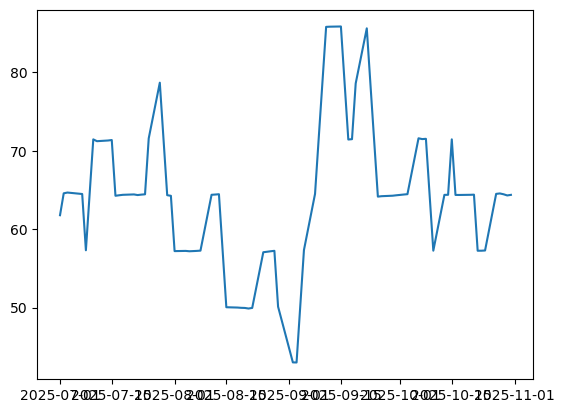

In [ ]:
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt

TICKER = "SPY"
MFI_LENGTH = 14 
OVERBROUGHT = 70
OVERSOLD = 30 
LOOKBACK = 100

def get_data(ticker = TICKER):
    df = yf.download(ticker, start="1993-04-01")
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:,:]

def add_MFI(df, length = MFI_LENGTH):
        # Step 1: Build the MFI Index
    df["Average_Price"] = (df["High"]+df["Low"]+df["Close"])/3
    df["Money_Flow"] = df["Volume"]*df["Average_Price"]
    # 14 Period Positive & Negative Money Flow
    df["Pos_Flow"] = np.where(df["Average_Price"].diff()>0, df["Average_Price"], 0)
        # diff() == Delta == Change in Prices from One Day to the next
    df["Neg_Flow"] = np.where(df["Average_Price"].diff()<0, df["Average_Price"], 0)
    # Money Flow Ratio - Rolling Average 
    df["MFR"] = df["Pos_Flow"].rolling(window=length).sum() / df["Neg_Flow"].rolling(window=length).sum()
    df["MFI"] = (100 - 100 / (1 + df["MFR"]))

        # Step 2: Plot the MFI Index
    plt.figure()
    plt.plot(df["MFI"])

        # Step 3: Draw Overbought & Oversold lines
    plt.axhline(OVERBROUGHT, color="red")
    # When the indicator line is above the red line --> asset overbought/overvalued     
    # Short Signal (Sell) triggered when the indicator line crosses above the red line
    plt.axhline(OVERSOLD, color="green")
    # When the indicator line is below this green line --> asset oversold/undervalued 
    # Long Signal (Buy) triggered when the indicator line crosses above the green line

    return df 

def main():
    df = get_data()
    df = add_MFI(df)
    return df

df = main()
print(df.head())
